# L'analyse de sentiment et classification des tweets français

### Module Terminologie et stylométrie
###### Par Mr Gael lejeune

###### Réalisé par : Ouali Jughurta

#### Dans ce projet nous allons entrainer un modèle de classification et expérimenter les méthodes de vectorisations et de classifcations
##### Train Dataset = 3907 tweets | Test Dataset = 976 tweets
##### Algorithmes utilisés : RandomForest, SVM, KNN, Naive Bayes, LogisticRegression 
##### Bibliothèques utilisées : glob, pandas, numpy, Sklean, Spacy, nltk 

In [ ]:
# importation des bib
## Jughurta ##
## Projet ##
import os
import codecs
import glob
import pandas as pd
import numpy as np
import sklearn
import nltk
import string
import json
import spacy
import string
nlp = spacy.load('fr_core_news_md')

## Importation des tweets pour le train

In [4]:
# à partir de disk
# création de deux listes
liste_tweets_train = []
liste_labels_train = []
for path in glob.glob("Dataset_tweets/*/*/*"):
    label = path[27:30] 
    
    f = codecs.open(path, encoding="utf-8")
    chaine = f.read()
    f.close()
    liste_tweets_train.append(chaine)
    liste_labels_train.append(label)
print("nombre de label de tweets : ",len(liste_labels_train))
print("nombre de tweets : ",len(liste_tweets_train))

nombre de label de tweets :  3906
nombre de tweets :  3906


## Importer les tweets pour le test

In [114]:
filename = "task1-testGold.json"
with open(filename, 'r') as f:
      data = json.load(f)

f.close()
liste_tweets_test = []
liste_labels_test = []
liste_tweets00_test = []
test_cleaned = []

        
for x in data['objective']:
    liste_tweets_test.append(x['content'])
for n in enumerate (data['objective']):
    liste_labels_test.append('obj')

for x in data['mixed']:
    liste_tweets_test.append(x['content'])
for n in enumerate (data['mixed']):
    liste_labels_test.append('mix')

for x in data['negative']:
    liste_tweets_test.append(x['content'])
for n in enumerate (data['negative']):
    liste_labels_test.append('neg')

for x in data['positive']:
    liste_tweets_test.append(x['content'])
for n in enumerate (data['positive']):
    liste_labels_test.append('pos')

In [117]:
# le nombre de tokens train dataset
liste_tweetsstr0 = str(liste_tweets_train)
tokens0 = nltk.word_tokenize(liste_tweetsstr0, language="french")

liste_tweetsstr1 = str(liste_tweets_test)
tokens1 = nltk.word_tokenize(liste_tweetsstr1, language="french")


print("le nombre de tokens corpus brut train dataset: " , len(tokens0))
print("le nombre de tokens corpus brut test  dataset: " , len(tokens1))


le nombre de tokens corpus brut train dataset:  93187
le nombre de tokens corpus brut test  dataset:  23652


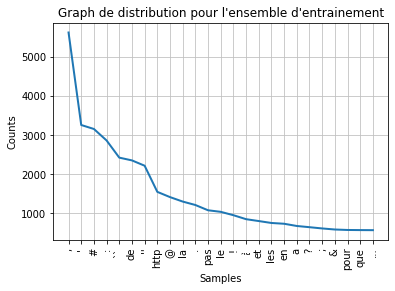

In [122]:
# # affciher les 25 tokens les plus fréquents dataset train
freq = nltk.FreqDist(tokens0)
freq.plot(25, title="Graph de distribution pour l'ensemble d'entrainement")


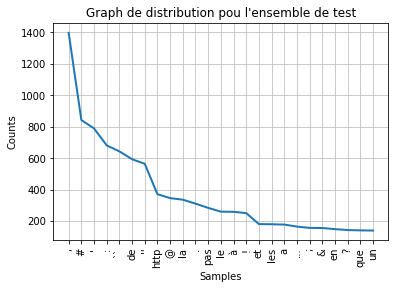

In [444]:
# # affciher les 25 tokens les plus fréquents dataset test
freq = nltk.FreqDist(tokens1)
freq.plot(25, title="Graph de distribution pou l'ensemble de test")

# Baseline

## représentation vecorielle

In [486]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

countV=CountVectorizer()

countx = countV.fit_transform(liste_tweets_train)

countx.toarray().shape

(3906, 13007)

### création d'un modele avec l'algorithme randomForest

In [487]:
#importer le classifier RondomForst
from sklearn.ensemble import RandomForestClassifier
# créer une instance du classifier
clf_rf = RandomForestClassifier()

clf_rf.fit(countx, liste_labels_train)

C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Création d'un modele avec l'algorithme SVM

In [489]:
from sklearn.svm import LinearSVC #import l'algortithme SVM
clf_svm = LinearSVC() #instancier l'algorithme
clf_svm.fit(countx, liste_labels_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

## creation d'un modèle avec KNN

In [490]:
from sklearn.neighbors import KNeighborsClassifier # importer l'algorithme KNeighborsClassier alis Knn
clf_knn = KNeighborsClassifier(n_neighbors=25)
clf_knn.fit(countx, liste_labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

## creation d'un modèle avec NB

In [491]:
from sklearn.naive_bayes import MultinomialNB
clf_nb = MultinomialNB()
clf_nb.fit(countx, liste_labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## creation d'un modèle de regression logistic

In [492]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(countx, liste_labels_train)

C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## représentation vectorielle "pour le test"

In [493]:
county = countV.transform(liste_tweets_test)
prediction_algo_1 = clf_rf.predict(county)
prediction_algo_2 = clf_svm.predict(county)
prediction_algo_4 = clf_knn.predict(county)
prediction_algo_5 = clf_nb.predict(county)
prediction_algo_6 = clf_lr.predict(county)

In [517]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

print("Matrice de confusion avec Random forst (BOW)")
print (confusion_matrix(liste_labels_test, prediction_algo_1))
print (classification_report(liste_labels_test, prediction_algo_1))

print("Matrice de confusion avec SVM (BOW)")
print (confusion_matrix(liste_labels_test, prediction_algo_2))
print (classification_report(liste_labels_test, prediction_algo_2))


print("Matrice de confusion avec Knn (BOW)")
print (confusion_matrix(liste_labels_test, prediction_algo_4))
print (classification_report(liste_labels_test, prediction_algo_4))

print("Matrice de confusion avec nb (BOW)")
mc_nb_bow = confusion_matrix(liste_labels_test, prediction_algo_5)
print (confusion_matrix(liste_labels_test, prediction_algo_5))
print (classification_report(liste_labels_test, prediction_algo_5))

print("Matrice de confusion avec lr (BOW)")
print (confusion_matrix(liste_labels_test, prediction_algo_6))
print (classification_report(liste_labels_test, prediction_algo_6))



Matrice de confusion avec Random forst (BOW)
[[ 16  73  25  10]
 [ 19 220  69  10]
 [  6  83 308  14]
 [  8  41  19  55]]
              precision    recall  f1-score   support

         mix       0.33      0.13      0.18       124
         neg       0.53      0.69      0.60       318
         obj       0.73      0.75      0.74       411
         pos       0.62      0.45      0.52       123

    accuracy                           0.61       976
   macro avg       0.55      0.50      0.51       976
weighted avg       0.60      0.61      0.60       976

Matrice de confusion avec SVM (BOW)
[[ 26  55  21  22]
 [ 41 190  64  23]
 [ 19  67 308  17]
 [ 13  20  17  73]]
              precision    recall  f1-score   support

         mix       0.26      0.21      0.23       124
         neg       0.57      0.60      0.58       318
         obj       0.75      0.75      0.75       411
         pos       0.54      0.59      0.57       123

    accuracy                           0.61       976
   m

## ponderation avec tf-idf

In [14]:
# countvectoriser  => (bag of word)
# tfidf tranformer => pondération en tf-idf
# tfidf vectoriser => CountVectoriser + tfidf transformer (dans un seul module)

In [522]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVecoriser = TfidfVectorizer()

tf_idf_count_train = tfidfVecoriser.fit_transform(liste_tweets_train)
tf_idf_count_test = tfidfVecoriser.transform(liste_tweets_test)

clf_rf.fit(tf_idf_count_train, liste_labels_train)
prediction_algo_1_tfidf = clf_rf.predict(tf_idf_count_test)

clf_svm.fit(tf_idf_count_train, liste_labels_train)
prediction_algo_2_tfidf = clf_svm.predict(tf_idf_count_test)

clf_knn.fit(tf_idf_count_train, liste_labels_train)
prediction_algo_4_tfidf = clf_knn.predict(tf_idf_count_test)

clf_nb.fit(tf_idf_count_train, liste_labels_train)
prediction_algo_5_tfidf = clf_nb.predict(tf_idf_count_test)

clf_lr.fit(tf_idf_count_train, liste_labels_train)
prediction_algo_6_tfidf = clf_lr.predict(tf_idf_count_test)


print("Matrice de confusion avec Random forst (TF-IDF)")
print (confusion_matrix(liste_labels_test, prediction_algo_1_tfidf))
print (classification_report(liste_labels_test, prediction_algo_1_tfidf))

print("Matrice de confusion avec SVM (TF-IDF)")
print (confusion_matrix(liste_labels_test, prediction_algo_2_tfidf))
print (classification_report(liste_labels_test, prediction_algo_2_tfidf))


print("Matrice de confusion avec Knn (TF-IDF)")
print (confusion_matrix(liste_labels_test, prediction_algo_4_tfidf))
print (classification_report(liste_labels_test, prediction_algo_4_tfidf))

print("Matrice de confusion avec NB (TF-IDF)")
confusion_matrix(liste_labels_test, prediction_algo_5_tfidf)
print (confusion_matrix(liste_labels_test, prediction_algo_5_tfidf))
print (classification_report(liste_labels_test, prediction_algo_5_tfidf))

print("Matrice de confusion avec lr (TF-IDF)")
confusion_matrix(liste_labels_test, prediction_algo_6_tfidf)
print (confusion_matrix(liste_labels_test, prediction_algo_6_tfidf))
print (classification_report(liste_labels_test, prediction_algo_6_tfidf))

#print('accuracy for baseline with Random forst(TF-IDF): ', accuracy_score(prediction_algo_1_tfidf, liste_labels_test))
#print('accuracy for baseline with SVM         (TF-IDF): ', accuracy_score(prediction_algo_2_tfidf, liste_labels_test))
#print('accuracy for baseline with Knn         (TF-IDF): ', accuracy_score(prediction_algo_4_tfidf, liste_labels_test))
#print('accuracy for baseline with nb          (TF-IDF): ', accuracy_score(prediction_algo_5_tfidf, liste_labels_test))
#print('accuracy for baseline with lr          (TF-IDF): ', accuracy_score(prediction_algo_6_tfidf, liste_labels_test))
# Ps : pour RandomForest le score n'est pas stable
# Ps : Pour SVM le score est stable, aucune augmentation visible
# ps : pour TD le score n'est pas stable
# ps : pour KNN le score est stable, une amélioration est visible au niveau du score

C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Matrice de confusion avec Random forst (TF-IDF)
[[ 11  66  36  11]
 [ 15 220  67  16]
 [  9  82 311   9]
 [  9  46  18  50]]
              precision    recall  f1-score   support

         mix       0.25      0.09      0.13       124
         neg       0.53      0.69      0.60       318
         obj       0.72      0.76      0.74       411
         pos       0.58      0.41      0.48       123

    accuracy                           0.61       976
   macro avg       0.52      0.49      0.49       976
weighted avg       0.58      0.61      0.58       976

Matrice de confusion avec SVM (TF-IDF)
[[ 23  63  23  15]
 [ 21 223  62  12]
 [  4  65 330  12]
 [ 10  34  14  65]]
              precision    recall  f1-score   support

         mix       0.40      0.19      0.25       124
         neg       0.58      0.70      0.63       318
         obj       0.77      0.80      0.79       411
         pos       0.62      0.53      0.57       123

    accuracy                           0.66       97

## Comparaison entre CountVectorizer et tfidfVectorizer

In [537]:
print("#"*60)
print('accuracy for baseline with Random forst: ', accuracy_score(prediction_algo_1, liste_labels_test))
print('accuracy for baseline with SVM         : ', accuracy_score(prediction_algo_2, liste_labels_test))
print('accuracy for baseline with Knn         : ', accuracy_score(prediction_algo_4, liste_labels_test))
print('accuracy for baseline with Naive bayes : ', accuracy_score(prediction_algo_5, liste_labels_test))
print('accuracy for baseline with LogisticReg : ', accuracy_score(prediction_algo_6, liste_labels_test))

print("#"*60)

print('accuracy for baseline with Random forst(TF-IDF): ', accuracy_score(prediction_algo_1_tfidf, liste_labels_test))
print('accuracy for baseline with SVM         (TF-IDF): ', accuracy_score(prediction_algo_2_tfidf, liste_labels_test))
print('accuracy for baseline with Knn         (TF-IDF): ', accuracy_score(prediction_algo_4_tfidf, liste_labels_test))
print('accuracy for baseline with nb          (TF-IDF): ', accuracy_score(prediction_algo_5_tfidf, liste_labels_test))
print('accuracy for baseline with LogisticReg (TF-IDF): ', accuracy_score(prediction_algo_6_tfidf, liste_labels_test))

print("#"*60)

############################################################
accuracy for baseline with Random forst:  0.6137295081967213
accuracy for baseline with SVM         :  0.6116803278688525
accuracy for baseline with Knn         :  0.5020491803278688
accuracy for baseline with Naive bayes :  0.6331967213114754
accuracy for baseline with LogisticReg :  0.6506147540983607
############################################################
accuracy for baseline with Random forst(TF-IDF):  0.6065573770491803
accuracy for baseline with SVM         (TF-IDF):  0.6567622950819673
accuracy for baseline with Knn         (TF-IDF):  0.6260245901639344
accuracy for baseline with nb          (TF-IDF):  0.6034836065573771
accuracy for baseline with LogisticReg (TF-IDF):  0.6413934426229508
############################################################


##  classification avec Pré-traitements des données

#### la librairie Spacy est utilisé pour le traitement de ces données

In [534]:
# fonctions créees

def mytokenizer_spacy(article):
    nlp = spacy.load('fr_core_news_md')
    doc = nlp(article)
    tokens = [token.text for token in doc]
    return tokens

def mypreproceesing_spacy(data):
    
        tokens = nlp(data)
        tweets_cleaned = []
        tweets_cleaned = [token.lemma_.lower() for token in tokens if token.lemma_ !='-PRON-' if not token.is_punct
                         if not token.is_stop if not token.like_url if not token.is_space 
                          if not token.like_num if not str(token).startswith('@')]
        
        test_cleaned=' '.join(tweets_cleaned)
        tweets_cleaned.append(test_cleaned)
        return tweets_cleaned

In [497]:
liste_tweets_train_cleaned = []
liste_labels_train = []
for path in glob.glob("Dataset_tweets/*/*/*"):
    label = path[27:30]
    
    f = codecs.open(path, encoding="utf-8")
    chaine = f.read()
    tokens = nlp(chaine)
    tweets_cleaned = []
    tweets_cleaned = [token.lemma_.lower() for token in tokens if token.lemma_ !='-PRON-' if not token.is_punct]
    f.close()
    cleaned=' '.join(tweets_cleaned)
    #doublant_correct = re.sub(r'(.)\1+', r'\1\1', cleaned)
    liste_tweets_train_cleaned.append(cleaned)
    liste_labels_train.append(label)

print("nombre de label de tweets : ",len(liste_labels00_train))
print("nombre de tweets : ",len(liste_tweets00_train))

nombre de label de tweets :  3906
nombre de tweets :  3906


In [498]:
filename = "task1-testGold.json"
with open(filename, 'r') as f:
      data = json.load(f)

f.close()
liste_tweets_test = []
liste_labels_test = []
liste_tweets_test_cleaned = []
test_cleaned = []

        
for x in data['objective']:
    liste_tweets_test.append(x['content'])
for n in enumerate (data['objective']):
    liste_labels_test.append('obj')

for x in data['mixed']:
    liste_tweets_test.append(x['content'])
for n in enumerate (data['mixed']):
    liste_labels_test.append('mix')

for x in data['negative']:
    liste_tweets_test.append(x['content'])
for n in enumerate (data['negative']):
    liste_labels_test.append('neg')

for x in data['positive']:
    liste_tweets_test.append(x['content'])
for n in enumerate (data['positive']):
    liste_labels_test.append('pos')

for x in liste_tweets_test:
    tokens = nlp(x)
    tweets_cleaned = []
    tweets_cleaned = [token.lemma_.lower() for token in tokens if token.lemma_ !='-PRON-' if not token.is_punct]
    cleaned=' '.join(tweets_cleaned)
    #doublant_correct = re.sub(r'(.)\1+', r'\1\1', cleaned)
    liste_tweets_test_cleaned.append(cleaned)

In [509]:
countV=CountVectorizer()
countx = countV.fit_transform(liste_tweets_train_cleaned)
countx.toarray().shape

(3906, 11742)

In [510]:
#importer le classifier RondomForst

clf_rf = RandomForestClassifier()
clf_rf.fit(countx, liste_labels_train)


clf_svm = LinearSVC() #instancier l'algorithme
clf_svm.fit(countx, liste_labels_train)

# importer l'algorithme KNeighborsClassier alis Knn
clf_knn = KNeighborsClassifier(n_neighbors=25)
clf_knn.fit(countx, liste_labels_train)


clf_nb = MultinomialNB()
clf_nb.fit(countx, liste_labels_train)

clf_lr = LogisticRegression()
clf_lr.fit(countx, liste_labels_train)

county = countV.transform(liste_tweets_test_cleaned)
prediction_algo_1 = clf_rf.predict(county)
prediction_algo_2 = clf_svm.predict(county)
prediction_algo_4 = clf_knn.predict(county)
prediction_algo_5 = clf_nb.predict(county)
prediction_algo_6 = clf_lr.predict(county)

C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [511]:
tfidfVecoriser = TfidfVectorizer()

tf_idf_count_train = tfidfVecoriser.fit_transform(liste_tweets_train_cleaned)
tf_idf_count_test = tfidfVecoriser.transform(liste_tweets_test_cleaned)

clf_rf.fit(tf_idf_count_train, liste_labels_train)
prediction_algo_1_tfidf = clf_rf.predict(tf_idf_count_test)

clf_svm.fit(tf_idf_count_train, liste_labels_train)
prediction_algo_2_tfidf = clf_svm.predict(tf_idf_count_test)

clf_knn.fit(tf_idf_count_train, liste_labels_train)
prediction_algo_4_tfidf = clf_knn.predict(tf_idf_count_test)

clf_nb.fit(tf_idf_count_train, liste_labels_train)
prediction_algo_5_tfidf = clf_nb.predict(tf_idf_count_test)

clf_lr.fit(tf_idf_count_train, liste_labels_train)
prediction_algo_6_tfidf = clf_lr.predict(tf_idf_count_test)

C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [529]:

print("Matrice de confusion => Random forst (pretraitement +TF-IDF)")
print (confusion_matrix(liste_labels_test, prediction_algo_1_tfidf))
print (classification_report(liste_labels_test, prediction_algo_1_tfidf))

print('#'*60)

print("Matrice de confusion => SVM (pretraitement +TF-IDF)")
print (confusion_matrix(liste_labels_test, prediction_algo_2_tfidf))
print (classification_report(liste_labels_test, prediction_algo_2_tfidf))

print('#'*60)

print("Matrice de confusion => Knn (pretraitement +TF-IDF)")
print (confusion_matrix(liste_labels_test, prediction_algo_4_tfidf))
print (classification_report(liste_labels_test, prediction_algo_4_tfidf))

print('#'*60)

print("Matrice de confusion => NV (pretraitement +TF-IDF)")
print (confusion_matrix(liste_labels_test, prediction_algo_5_tfidf))
print (classification_report(liste_labels_test, prediction_algo_5_tfidf))

print('#'*60)

print("Matrice de confusion => LR (pretraitement +TF-IDF)")
print (confusion_matrix(liste_labels_test, prediction_algo_6_tfidf))
print (classification_report(liste_labels_test, prediction_algo_6_tfidf))

Matrice de confusion => Random forst (pretraitement +TF-IDF)
[[ 11  66  36  11]
 [ 15 220  67  16]
 [  9  82 311   9]
 [  9  46  18  50]]
              precision    recall  f1-score   support

         mix       0.25      0.09      0.13       124
         neg       0.53      0.69      0.60       318
         obj       0.72      0.76      0.74       411
         pos       0.58      0.41      0.48       123

    accuracy                           0.61       976
   macro avg       0.52      0.49      0.49       976
weighted avg       0.58      0.61      0.58       976

############################################################
Matrice de confusion => SVM (pretraitement +TF-IDF)
[[ 23  63  23  15]
 [ 21 223  62  12]
 [  4  65 330  12]
 [ 10  34  14  65]]
              precision    recall  f1-score   support

         mix       0.40      0.19      0.25       124
         neg       0.58      0.70      0.63       318
         obj       0.77      0.80      0.79       411
         pos       0

In [531]:
print('accuracy with preprocessing Random forst: ', accuracy_score(prediction_algo_1, liste_labels_test))
print('accuracy with preprocessing SVM         : ', accuracy_score(prediction_algo_2, liste_labels_test))
print('accuracy with preprocessing Knn         : ', accuracy_score(prediction_algo_4, liste_labels_test))
print('accuracy with preprocessing NB          : ', accuracy_score(prediction_algo_5, liste_labels_test))
print('accuracy with preprocessing lr          : ', accuracy_score(prediction_algo_6, liste_labels_test))
print('#'*90)
print('accuracy with preprocessing Random forst(TF-IDF): ', accuracy_score(prediction_algo_1_tfidf, liste_labels_test))
print('accuracy with preprocessing SVM         (TF-IDF): ', accuracy_score(prediction_algo_2_tfidf, liste_labels_test))
print('accuracy with preprocessing Knn         (TF-IDF): ', accuracy_score(prediction_algo_4_tfidf, liste_labels_test))
print('accuracy with preprocessing nb          (TF-IDF): ', accuracy_score(prediction_algo_5_tfidf, liste_labels_test))
print('accuracy with preprocessing lr          (TF-IDF): ', accuracy_score(prediction_algo_6_tfidf, liste_labels_test))

accuracy with preprocessing Random forst:  0.6137295081967213
accuracy with preprocessing SVM         :  0.6116803278688525
accuracy with preprocessing Knn         :  0.5020491803278688
accuracy with preprocessing NB          :  0.6331967213114754
accuracy with preprocessing lr          :  0.6506147540983607
##########################################################################################
accuracy with preprocessing Random forst(TF-IDF):  0.6065573770491803
accuracy with preprocessing SVM         (TF-IDF):  0.6567622950819673
accuracy with preprocessing Knn         (TF-IDF):  0.6260245901639344
accuracy with preprocessing nb          (TF-IDF):  0.6034836065573771
accuracy with preprocessing lr          (TF-IDF):  0.6413934426229508


## OneVsRestClassifier 

In [525]:
from sklearn.multiclass import OneVsRestClassifier

# BOW + OnevsRest

countV=CountVectorizer(ngram_range=(1,2))
countx = countV.fit_transform(liste_tweets_train_cleaned)
county = countV.transform(liste_tweets_test_cleaned)

clf_rf_rf_bis = OneVsRestClassifier(RandomForestClassifier()).fit(countx, liste_labels_train)
prediction_algo_1_onevsrest = clf_rf_rf_bis.predict(county)

clf_rf_svm_bis = OneVsRestClassifier(LinearSVC()).fit(countx, liste_labels_train)
prediction_algo_2_onevsrest = clf_rf_svm_bis.predict(county)

clf_rf_knn_bis = OneVsRestClassifier(KNeighborsClassifier()).fit(countx, liste_labels_train)
prediction_algo_3_onevsrest = clf_rf_knn_bis.predict(county)

clf_rf_nb_bis = OneVsRestClassifier(MultinomialNB()).fit(countx, liste_labels_train)
prediction_algo_4_onevsrest = clf_rf_nb_bis.predict(county)

clf_rf_lr_bis = OneVsRestClassifier(LogisticRegression()).fit(countx, liste_labels_train)
prediction_algo_5_onevsrest = clf_rf_lr_bis.predict(county)



# TF-IDF OnevsRest

tfidfVecoriser = TfidfVectorizer()

tf_idf_count_train = tfidfVecoriser.fit_transform(liste_tweets_train_cleaned)
tf_idf_count_test = tfidfVecoriser.transform(liste_tweets_test_cleaned)

clf_rf_ovr = OneVsRestClassifier(RandomForestClassifier()).fit(tf_idf_count_train, liste_labels_train)
prediction_algo_1_tfidf_onevsrest = clf_rf_ovr.predict(tf_idf_count_test)

clf_svm_ovr = OneVsRestClassifier(LinearSVC()).fit(tf_idf_count_train, liste_labels_train)
prediction_algo_2_tfidf_onevsrest = clf_svm_ovr.predict(tf_idf_count_test)

clf_knn_ovr = OneVsRestClassifier(KNeighborsClassifier()).fit(tf_idf_count_train, liste_labels_train)
prediction_algo_3_tfidf_onevsrest = clf_knn_ovr.predict(tf_idf_count_test)

clf_nb_ovr = OneVsRestClassifier(MultinomialNB()).fit(tf_idf_count_train, liste_labels_train)
prediction_algo_4_tfidf_onevsrest = clf_nb_ovr.predict(tf_idf_count_test)

clf_lr_ovr = OneVsRestClassifier(LogisticRegression()).fit(tf_idf_count_train, liste_labels_train)
prediction_algo_5_tfidf_onevsrest = clf_lr_ovr.predict(tf_idf_count_test)

print("Matrice de confusion avec Random forst (TF-IDF)")
print (confusion_matrix(liste_labels_test, prediction_algo_1_tfidf_onevsrest))
print (classification_report(liste_labels_test, prediction_algo_1_tfidf_onevsrest))

print("Matrice de confusion avec SVM (TF-IDF)")
print (confusion_matrix(liste_labels_test, prediction_algo_2_tfidf_onevsrest))
print (classification_report(liste_labels_test, prediction_algo_2_tfidf_onevsrest))


print("Matrice de confusion avec Knn (TF-IDF)")
print (confusion_matrix(liste_labels_test, prediction_algo_3_tfidf_onevsrest))
print (classification_report(liste_labels_test, prediction_algo_3_tfidf_onevsrest))



print("Matrice de confusion avec NV (TF-IDF)")
print (confusion_matrix(liste_labels_test, prediction_algo_4_tfidf_onevsrest))
print (classification_report(liste_labels_test, prediction_algo_4_tfidf_onevsrest))


print("Matrice de confusion avec lr (TF-IDF)")
print (confusion_matrix(liste_labels_test, prediction_algo_5_tfidf_onevsrest))
print (classification_report(liste_labels_test, prediction_algo_5_tfidf_onevsrest))
                                    
print("accuracy Random Forest   ( bow+OnevsRest ): " ,accuracy_score(prediction_algo_1_onevsrest, liste_labels_test))
print("accuracy svm             ( bow+OnevsRest ): " ,accuracy_score(prediction_algo_2_onevsrest, liste_labels_test))
print("accuracy knn             ( bow+OnevsRest ): " ,accuracy_score(prediction_algo_3_onevsrest, liste_labels_test))
print("accuracy naive bayes     ( bow+OnevsRest ): " ,accuracy_score(prediction_algo_4_onevsrest, liste_labels_test))
print("accuracy LogisticRegression( bow+OnevsRest ): " ,accuracy_score(prediction_algo_5_onevsrest, liste_labels_test))

print('#'*60)

print("accuracy Random Forest    (tf-idf+OnevsRest): " ,accuracy_score(prediction_algo_1_tfidf_onevsrest, liste_labels_test))
print("accuracy svm              (tf-idf+OnevsRest): " ,accuracy_score(prediction_algo_2_tfidf_onevsrest, liste_labels_test))
print("accuracy knn              (tf-idf+OnevsRest): " ,accuracy_score(prediction_algo_3_tfidf_onevsrest, liste_labels_test))
print("accuracy naive bayes      (tf-idf+OnevsRest): " ,accuracy_score(prediction_algo_4_tfidf_onevsrest, liste_labels_test))
print("accuracy LogiticRegression (tf-idf+OnevsRest): " ,accuracy_score(prediction_algo_5_tfidf_onevsrest, liste_labels_test))

# avec la méthode oneVsRestClassifier nous avons remarqué une lègére améloration au niveau de l'algo RandomForest


C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\linear_mod

Matrice de confusion avec Random forst (TF-IDF)
[[  4  64  31  25]
 [  7 195  87  29]
 [  1  59 334  17]
 [  3  29  20  71]]
              precision    recall  f1-score   support

         mix       0.27      0.03      0.06       124
         neg       0.56      0.61      0.59       318
         obj       0.71      0.81      0.76       411
         pos       0.50      0.58      0.54       123

    accuracy                           0.62       976
   macro avg       0.51      0.51      0.48       976
weighted avg       0.58      0.62      0.58       976

Matrice de confusion avec SVM (TF-IDF)
[[ 18  67  25  14]
 [ 20 227  59  12]
 [  7  60 332  12]
 [  8  25  13  77]]
              precision    recall  f1-score   support

         mix       0.34      0.15      0.20       124
         neg       0.60      0.71      0.65       318
         obj       0.77      0.81      0.79       411
         pos       0.67      0.63      0.65       123

    accuracy                           0.67       97

C:\Users\jugurtha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         mix       0.00      0.00      0.00       124
         neg       0.51      0.69      0.59       318
         obj       0.70      0.84      0.76       411
         pos       0.78      0.29      0.43       123

    accuracy                           0.62       976
   macro avg       0.50      0.46      0.44       976
weighted avg       0.56      0.62      0.57       976

Matrice de confusion avec lr (TF-IDF)
[[  3  85  27   9]
 [  1 241  69   7]
 [  0  73 329   9]
 [  1  45  21  56]]
              precision    recall  f1-score   support

         mix       0.60      0.02      0.05       124
         neg       0.54      0.76      0.63       318
         obj       0.74      0.80      0.77       411
         pos       0.69      0.46      0.55       123

    accuracy                           0.64       976
   macro avg       0.64      0.51      0.50       976
weighted avg       0.65      0.64      0.60       976

accuracy Random

In [533]:

print("Matrice de confusion => Random forst (pretraitement+TF-IDF+OneVersusRest)")
print (confusion_matrix(liste_labels_test, prediction_algo_1_tfidf_onevsrest))
print (classification_report(liste_labels_test, prediction_algo_1_tfidf_onevsrest))

print('#'*60)

print("Matrice de confusion => SVM (pretraitement+TF-IDF+OneVersusRest)")
print (confusion_matrix(liste_labels_test, prediction_algo_2_tfidf_onevsrest))
print (classification_report(liste_labels_test, prediction_algo_2_tfidf_onevsrest))

print('#'*60)

print("Matrice de confusion => Knn (pretraitement+TF-IDF+OneVersusRest)")
print (confusion_matrix(liste_labels_test, prediction_algo_3_tfidf_onevsrest))
print (classification_report(liste_labels_test, prediction_algo_3_tfidf_onevsrest))

print('#'*60)

print("Matrice de confusion => Naive bayes (pretraitement+TF-IDF+OneVersusRest)")
print (confusion_matrix(liste_labels_test, prediction_algo_4_tfidf_onevsrest))
print (classification_report(liste_labels_test, prediction_algo_4_tfidf_onevsrest))

print('#'*60)

print("Matrice de confusion => LogisticRegression (pretraitement+TF-IDF+OneVersusRest)")
print (confusion_matrix(liste_labels_test, prediction_algo_5_tfidf_onevsrest))
print (classification_report(liste_labels_test, prediction_algo_5_tfidf_onevsrest))

Matrice de confusion => Random forst (pretraitement+TF-IDF+OneVersusRest)
[[  4  64  31  25]
 [  7 195  87  29]
 [  1  59 334  17]
 [  3  29  20  71]]
              precision    recall  f1-score   support

         mix       0.27      0.03      0.06       124
         neg       0.56      0.61      0.59       318
         obj       0.71      0.81      0.76       411
         pos       0.50      0.58      0.54       123

    accuracy                           0.62       976
   macro avg       0.51      0.51      0.48       976
weighted avg       0.58      0.62      0.58       976

############################################################
Matrice de confusion => SVM (pretraitement+TF-IDF+OneVersusRest)
[[ 18  67  25  14]
 [ 20 227  59  12]
 [  7  60 332  12]
 [  8  25  13  77]]
              precision    recall  f1-score   support

         mix       0.34      0.15      0.20       124
         neg       0.60      0.71      0.65       318
         obj       0.77      0.81      0.79     